38.9


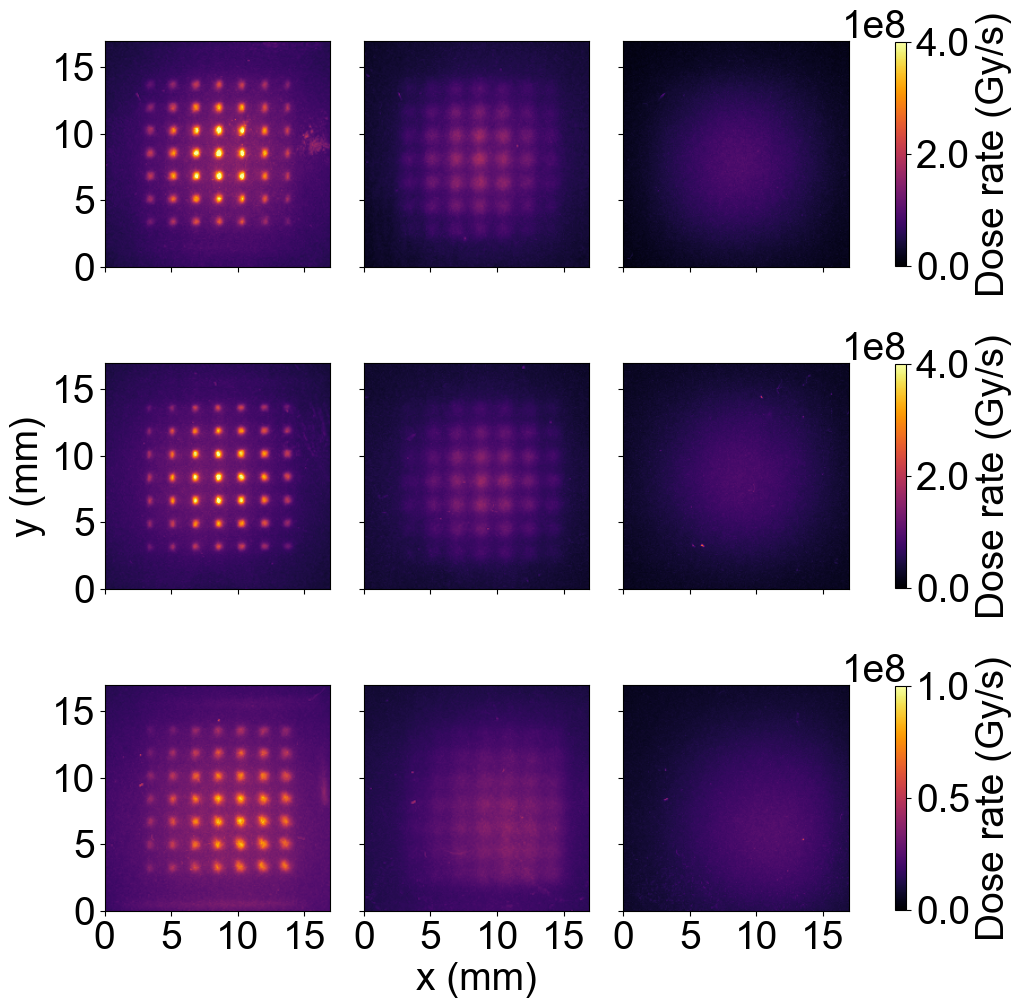

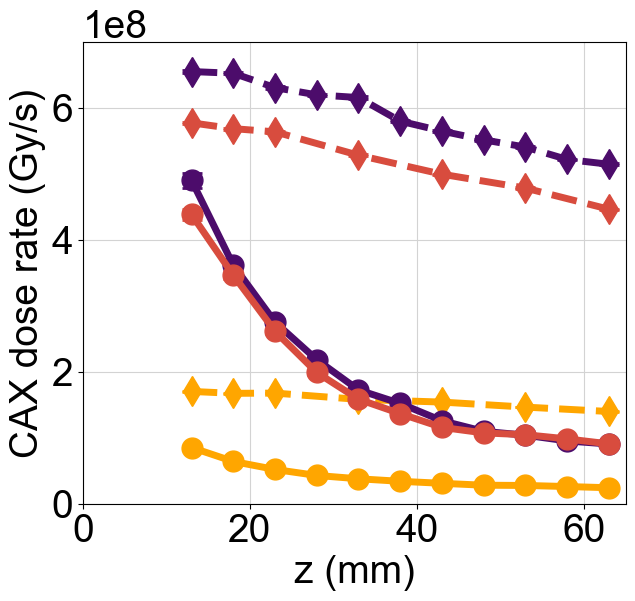

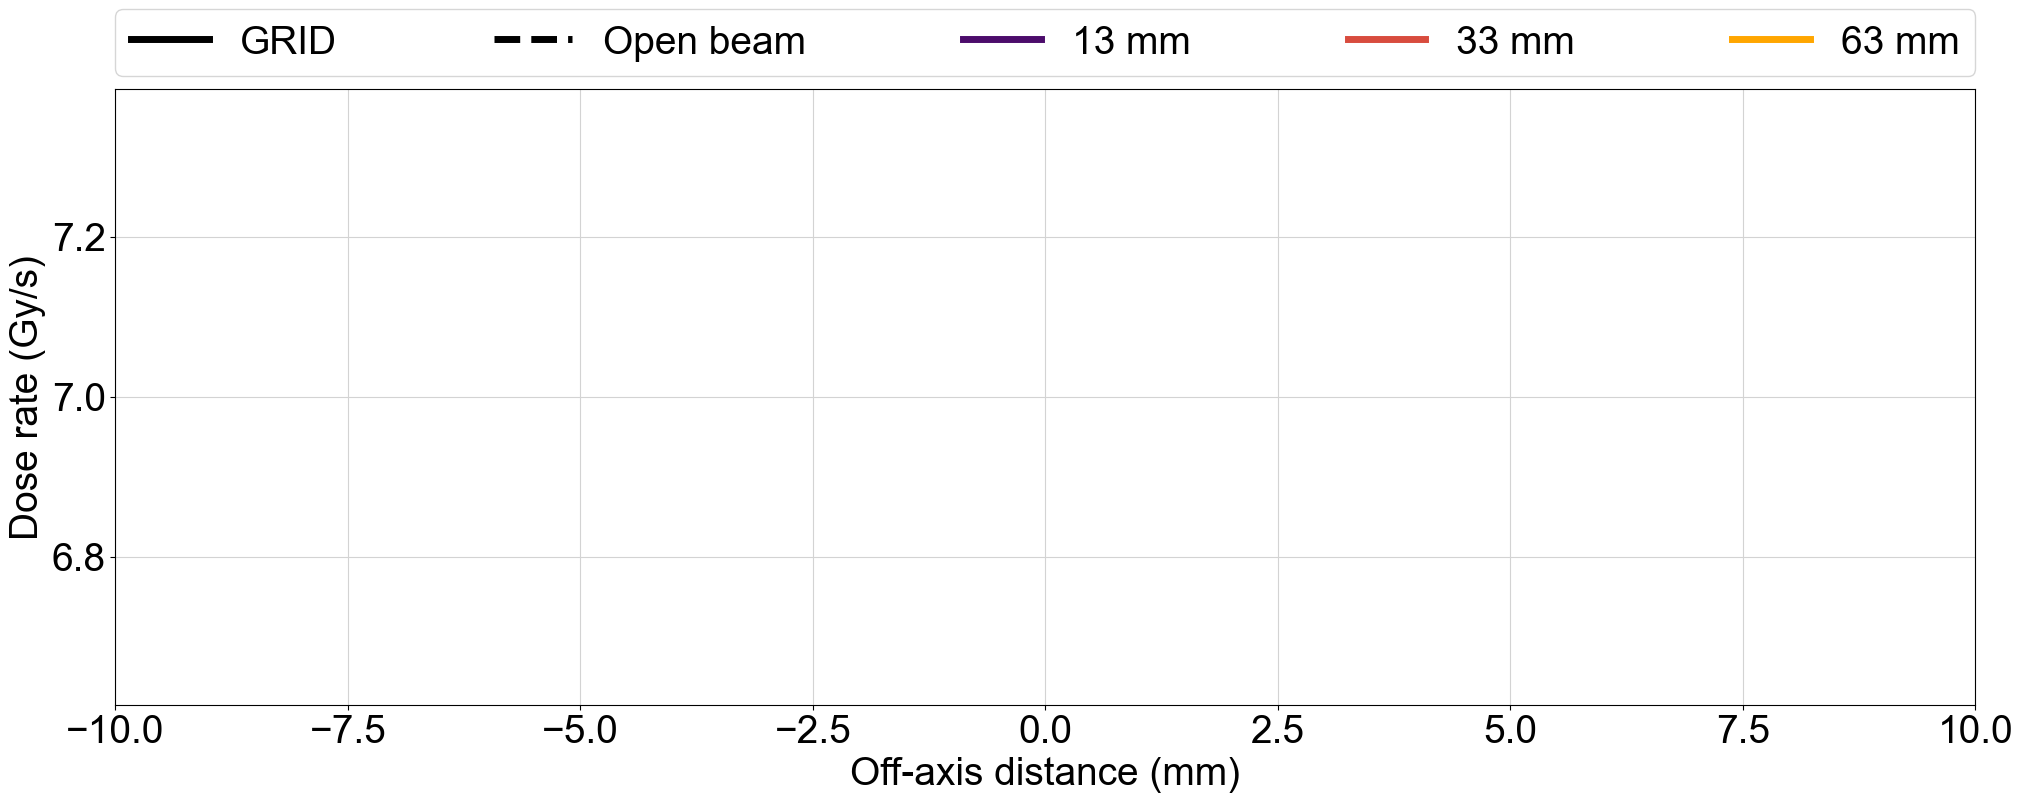

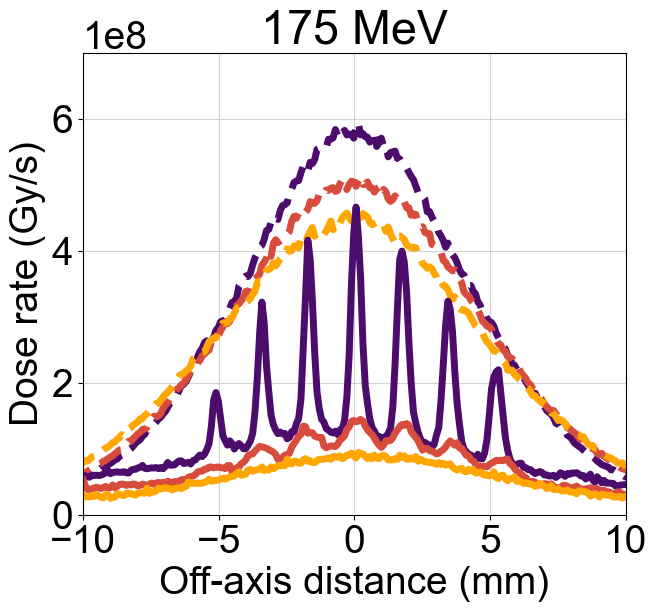

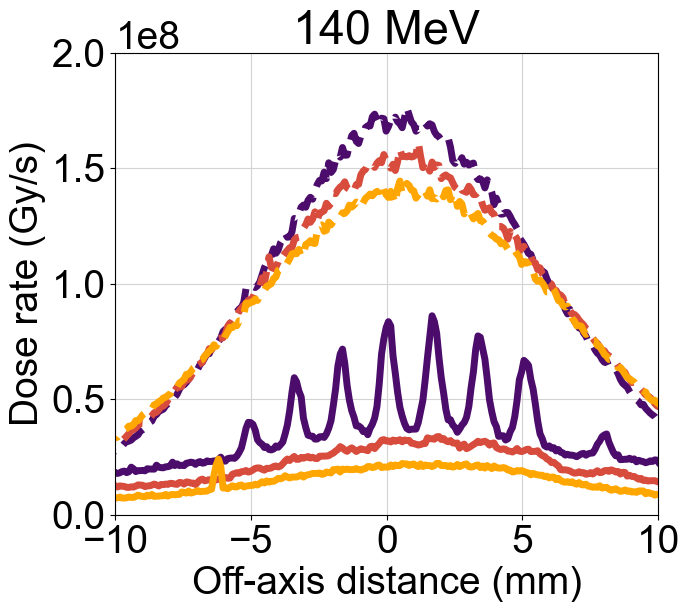

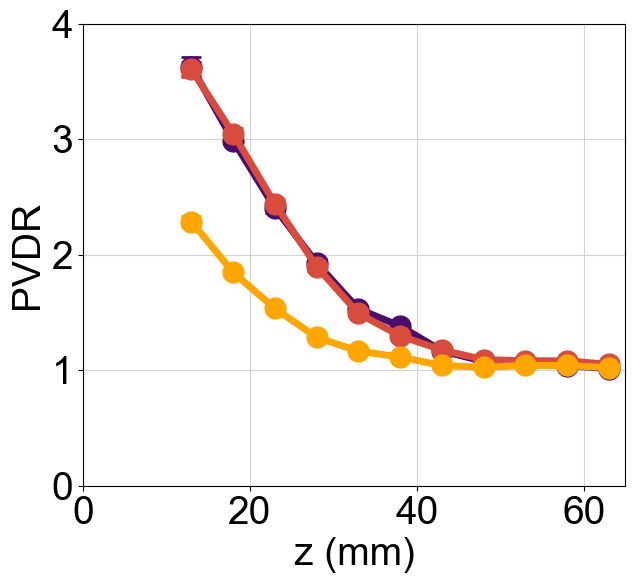

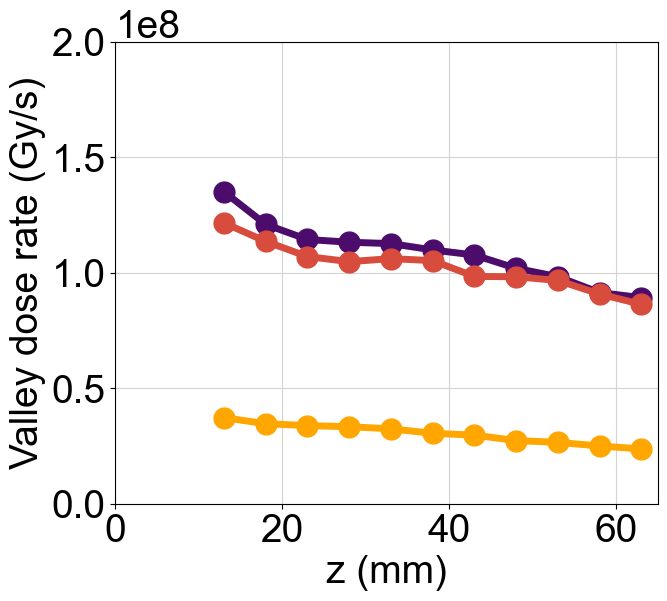

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd
from skimage.feature import peak_local_max
from scipy.optimize import curve_fit

%matplotlib inline
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#4c0c6b", "#d84c3e", "#ffa600"]) 


#Reading data in as films, peaks,peaks_std,
grid140=np.load('D:Desktop/thesis/140MeV.npy',allow_pickle=True)
ob140=np.load('D:Desktop/thesis/140MeVOB.npy',allow_pickle=True)
grid175=np.load('D:Desktop/thesis/175MeV.npy',allow_pickle=True)
ob175=np.load('D:Desktop/thesis/175MeVOB.npy',allow_pickle=True)
grid200=np.load('D:Desktop/thesis/200MeV.npy',allow_pickle=True)
ob200=np.load('D:Desktop/thesis/200MeVOB.npy',allow_pickle=True)
maxdose=8e8
step=120
full=step*2/300*25.4


# fig, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(12,12))
# axs[0,0].imshow(ob200[0][0][258-step:258+step,201-step:201+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# axs[0,1].imshow(ob200[0][4][258-step:258+step,201-step:201+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# im1=axs[0,2].imshow(ob200[0][-1][258-step:258+step,201-step:201+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# maxdose=7.5e8
# axs[1,0].imshow(ob175[0][0][235-step:235+step,183-step:183+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# axs[1,1].imshow(ob175[0][3][235-step:235+step,183-step:183+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# im2=axs[1,2].imshow(ob175[0][-1][235-step:235+step,183-step:183+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# maxdose=2e8
# axs[2,0].imshow(ob140[0][0][265-step:265+step,233-step:233+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# axs[2,1].imshow(ob140[0][3][265-step:265+step,233-step:233+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# im3=axs[2,2].imshow(ob140[0][-1][265-step:265+step,233-step:233+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
# plt.xticks([0,10,20])
# plt.yticks([0,10,20])
# plt.subplots_adjust(hspace=0.15,wspace=0.15)
# fig.colorbar(im1,ax=(axs[0,2],axs[0,1],axs[0,0]),label='Dose rate (Gy/s)',ticks=[0,2e8,4e8,5.5e8,8e8],shrink=0.8)
# fig.colorbar(im2,ax=(axs[1,2],axs[1,1],axs[1,0]),label='Dose rate (Gy/s)',shrink=0.8)
# fig.colorbar(im3,ax=(axs[2,2],axs[2,1],axs[2,0]),label='Dose rate (Gy/s)',ticks=[0,1e8,2e8],shrink=0.8)

# axs[2,1].set_xlabel('x (mm)')
# axs[1,0].set_ylabel('y (mm)')

#Gaussian fit
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_fit(xdata,ydata):
    mean = np.mean(xdata)
    sigma = np.std(xdata)
    popt,pcov = curve_fit(gaus,xdata,ydata,p0=[max(ydata), mean, sigma])
    plt.plot(np.arange(0,len(ydata)),gaus(xdata,*popt),label='Gaussian fit',lw=3)
    print(popt[-1]/300*25.4,np.sqrt(np.diag(pcov))[-1])


ypeak=235
xpeak=183
# figure(99,figsize=(8,8))
# plt.plot(ob175[0][0][xpeak,75:-75])
# gauss_fit(np.arange(0,len(ob175[0][0][xpeak,75:-75])),ob175[0][0][xpeak,75:-75])
# plt.plot(ob175[0][0].T[ypeak,75:-75])
# gauss_fit(np.arange(0,len(ob175[0][0].T[ypeak,75:-75])),ob175[0][0].T[ypeak,75:-75])






step=100
full=step*2/300*25.4
maxdose=4e8
tr1 = scipy.ndimage.rotate(grid200[0][0], 0.26)
tr2=scipy.ndimage.rotate(grid200[0][4], 0.65)
tr3=scipy.ndimage.rotate(grid175[0][0], -0.27)
tr4=scipy.ndimage.rotate(grid175[0][4], 1)
tr5=scipy.ndimage.rotate(grid140[0][0], 0.22)
tr6=scipy.ndimage.rotate(grid140[0][4], 1)

#2D plots grid
fig, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(12,12))
axs[0,0].imshow(tr1[219-step:219+step,198-step:198+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
axs[0,1].imshow(tr2[224-step:224+step,198-step:198+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
im1=axs[0,2].imshow(grid200[0][-1][222-step:222+step,194-step:194+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
maxdose=4e8
axs[1,0].imshow(tr3[229-step:229+step,212-step:212+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
axs[1,1].imshow(tr4[220-step:220+step,210-step:210+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
im2=axs[1,2].imshow(grid175[0][-1][222-step:222+step,212-step:212+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
maxdose=10e7
axs[2,0].imshow(tr5[237-step:237+step,222-step:222+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
axs[2,1].imshow(tr6[225-step:225+step,213-step:213+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full))
im3=axs[2,2].imshow(grid140[0][-1][223-step:223+step,215-step:215+step],vmin=0,vmax=maxdose,cmap='inferno',extent=(0,full,0,full)) 
plt.subplots_adjust(hspace=0.15,wspace=0.15)
fig.colorbar(im1,ax=(axs[0,2],axs[0,1],axs[0,0]),label='Dose rate (Gy/s)',ticks=[0,2e8,4e8,5.5e8,8e8],shrink=0.8)
fig.colorbar(im2,ax=(axs[1,2],axs[1,1],axs[1,0]),label='Dose rate (Gy/s)',ticks=[0,2e8,4e8,5.5e8,8e8],shrink=0.8)
fig.colorbar(im3,ax=(axs[2,2],axs[2,1],axs[2,0]),label='Dose rate (Gy/s)',ticks=[0,5e7,10e7],shrink=0.8)
plt.xticks([0,5,10,15])
plt.yticks([0,5,10,15])
axs[2,1].set_xlabel('x (mm)')
axs[1,0].set_ylabel('y (mm)')

#PDDs
figure(2,figsize=(7,6))
# # plt.plot(ob200[1],ob200[2],marker='o',markersize=15,lw=5)
# # # plt.fill_between(ob200[1],ob200[2]-ob200[3],ob200[2]+ob200[3],alpha=0.4)
# # plt.plot(ob175[1],ob175[2],marker='o')
# # # plt.fill_between(ob175[1],ob175[2]-ob175[3],ob175[2]+ob175[3],alpha=0.4)
# # plt.plot(ob140[1],ob140[2],marker='o')
# # # plt.fill_between(ob140[1],ob140[2]-ob140[3],ob140[2]+ob140[3],alpha=0.4)
plt.errorbar(ob200[1],ob200[2],yerr=ob200[3],marker='d',markersize=15,capsize=7,lw=5,capthick=2,label='200 MeV OB',ls='--')
plt.errorbar(ob175[1],ob175[2],yerr=ob175[3],marker='d',markersize=15,capsize=7,lw=5,capthick=2,label='175 MeV OB',ls='--')
plt.errorbar(ob140[1],ob140[2],yerr=ob140[3],marker='d',markersize=15,capsize=7,lw=5,capthick=2,label='140 MeV OB',ls='--')
plt.errorbar(ob200[1],grid200[1],yerr=grid200[2],marker='o',markersize=15,capsize=7,lw=5,capthick=2,c='#4c0c6b',label='200 MeV GRID')
plt.errorbar(ob200[1],grid175[1],yerr=grid175[2],marker='o',markersize=15,capsize=7,lw=5,capthick=2,c='#d84c3e',label='175 MeV GRID')
plt.errorbar(ob200[1],grid140[1],yerr=grid140[2],marker='o',markersize=15,capsize=7,lw=5,capthick=2,c='#ffa600',label='140 MeV GRID')
plt.grid(c='lightgray')
plt.ylabel('CAX dose rate (Gy/s)')
plt.xlabel('z (mm)')
plt.xlim(0,65)
plt.ylim(0,7e8)
# #l1 = plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
# #l2 = plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
# #l3 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#mode="expand", borderaxespad=0, ncol=6)
#l5 = plt.legend(bbox_to_anchor=(1, 0), loc="lower right",
                #bbox_transform=fig.transFigure, ncol=3)
#l6 = plt.legend(bbox_to_anchor=(0.4, 0.8), loc="upper right")

x=np.arange(0,len(ob200[5][0]))-6.7*300/25.4
x140=np.arange(0,len(ob140[5][0]))-6.7*300/25.4

#1D central profile 200 MeV
figure(3,figsize=(24,8))
# plt.plot((x-5)/300*25.4-10,ob200[5][0],lw=5,label='13 mm OB',ls='--')
# plt.plot((x-3)/300*25.4-10,ob200[5][4],lw=5,label='33 mm OB',ls='--')
# plt.plot((x-5)/300*25.4-10,ob200[5][-1],lw=5,label='63 mm OB',ls='--')
# plt.plot(np.arange(0,len(tr1[0]))/300*25.4-6.7-10,np.mean([tr1[219],tr1[218],tr1[220]],axis=0),lw=5,label='13 mm GRID',c='#4c0c6b')
# plt.plot((np.arange(0,len(tr2[0]))-2)/300*25.4-6.7-10,np.mean([tr2[224],tr2[223],tr2[222]],axis=0),lw=5,label='33 mm GRID',c='#d84c3e')
# plt.plot((np.arange(0,len(grid200[0][-1][0]))+5)/300*25.4-6.7-10,np.mean([grid200[0][-1][222],grid200[0][-1][223],grid200[0][-1][221]],axis=0),lw=5,label='63 mm GRID',c='#ffa600')
plt.plot(7,c='black',label='GRID',lw=5)
plt.plot(7,c='black',label='Open beam',lw=5,ls='--')
plt.plot(7,c='#4c0c6b',label='13 mm',lw=5)
plt.plot(7,c='#d84c3e',label='33 mm',lw=5)
plt.plot(7,c='#ffa600',label='63 mm',lw=5)
l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
mode="expand", borderaxespad=0, ncol=5)

#plt.ylim(0,7e8)
plt.grid(c='lightgray')
plt.xlabel('Off-axis distance (mm)')
plt.ylabel('Dose rate (Gy/s)')
#plt.legend()
plt.xlim(-10,10)
#plt.title('200 MeV')

#1D central profile 175 MeV
figure(4,figsize=(7,6))
plt.plot((x+12)/300*25.4-10,ob175[5][0],lw=5,label='13 mm OB',ls='--')
plt.plot((x+8)/300*25.4-10,ob175[5][4],lw=5,label='33 mm OB',ls='--')
plt.plot((x+9)/300*25.4-10,ob175[5][-1],lw=5,label='63 mm OB',ls='--')
plt.plot((np.arange(0,len(tr3[0]))-14)/300*25.4-6.7-10,np.mean([tr3[229],tr3[230],tr3[228]],axis=0),lw=5,label='13 mm GRID',c='#4c0c6b')
plt.plot((np.arange(0,len(tr4[0]))-15)/300*25.4-6.7-10,np.mean([tr4[220],tr4[221],tr4[219]],axis=0),lw=5,label='33 mm GRID',c='#d84c3e')
plt.plot((np.arange(0,len(grid175[0][-1][0]))-15)/300*25.4-6.7-10,np.mean([grid175[0][-1][222],grid175[0][-1][223],grid175[0][-1][221]],axis=0),lw=5,label='63 mm GRID',c='#ffa600')

plt.ylim(0,7e8)
plt.grid(c='lightgray')
plt.xlabel('Off-axis distance (mm)')
plt.ylabel('Dose rate (Gy/s)')
#plt.legend()
plt.xlim(-10,10)
plt.title('175 MeV')

#1D central profile 140 MeV
figure(5,figsize=(7,6))
plt.plot((x140-26)/300*25.4-10,ob140[5][0],lw=5,label='13 mm OB',ls='--')
plt.plot((x140-16)/300*25.4-10,ob140[5][4],lw=5,label='33 mm OB',ls='--')
plt.plot((x140-26)/300*25.4-10,ob140[5][-1],lw=5,label='63 mm OB',ls='--')
plt.plot((np.arange(0,len(tr5[0]))-24)/300*25.4-6.7-10,np.mean([tr5[237],tr5[236],tr5[238]],axis=0),lw=5,label='13 mm GRID',c='#4c0c6b')
plt.plot((np.arange(0,len(tr6[0]))-20)/300*25.4-6.7-10,np.mean([tr6[225],tr6[224],tr6[226]],axis=0),lw=5,label='33 mm GRID',c='#d84c3e')
plt.plot((np.arange(0,len(grid140[0][-1][0]))-29)/300*25.4-6.7-10,np.mean([grid140[0][-1][222],grid140[0][-1][223],grid140[0][-1][224]],axis=0),lw=5,label='63 mm GRID',c='#ffa600')

plt.ylim(0,2e8)
plt.grid(c='lightgray')
plt.xlabel('Off-axis distance (mm)')
plt.ylabel('Dose rate (Gy/s)')
#plt.legend()
plt.xlim(-10,10)
plt.title('140 MeV')

#PVDR vs depth
figure(20,figsize=(7,6))
plt.errorbar(ob200[1],grid200[5],yerr=grid200[6],label='200 MeV',capsize=7,lw=5,marker='o',markersize=15,capthick=2)
plt.errorbar(ob200[1],grid175[5],yerr=grid175[6],label='175 MeV',capsize=7,lw=5,marker='o',markersize=15,capthick=2)
plt.errorbar(ob200[1],grid140[5],yerr=grid140[6],label='140 MeV',capsize=7,lw=5,marker='o',markersize=15,capthick=2)
plt.ylim(0,4)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('PVDR')
#plt.legend()
plt.xlim(0,65)

#valley dose vs depth
figure(14,figsize=(7,6))
plt.errorbar(ob200[1],grid200[7],yerr=grid200[8],marker='o',markersize=15,capsize=7,lw=5,capthick=2,c='#4c0c6b',label='200 MeV GRID')
plt.errorbar(ob200[1],grid175[7],yerr=grid175[8],marker='o',markersize=15,capsize=7,lw=5,capthick=2,c='#d84c3e',label='175 MeV GRID')
plt.errorbar(ob200[1],grid140[7],yerr=grid140[8],marker='o',markersize=15,capsize=7,lw=5,capthick=2,c='#ffa600',label='140 MeV GRID')
plt.grid(c='lightgray')
plt.ylabel('Valley dose rate (Gy/s)')
plt.xlabel('z (mm)')
plt.xlim(0,65)
plt.ylim(0,2e8)
#l1 = plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
#l2 = plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
#l3 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
#mode="expand", borderaxespad=0, ncol=6)

print(np.around(np.interp(1/1.1,1/(grid140[5]),ob200[1]),1))


(11, 475, 414)


Text(0.5, 0, 'x (mm)')

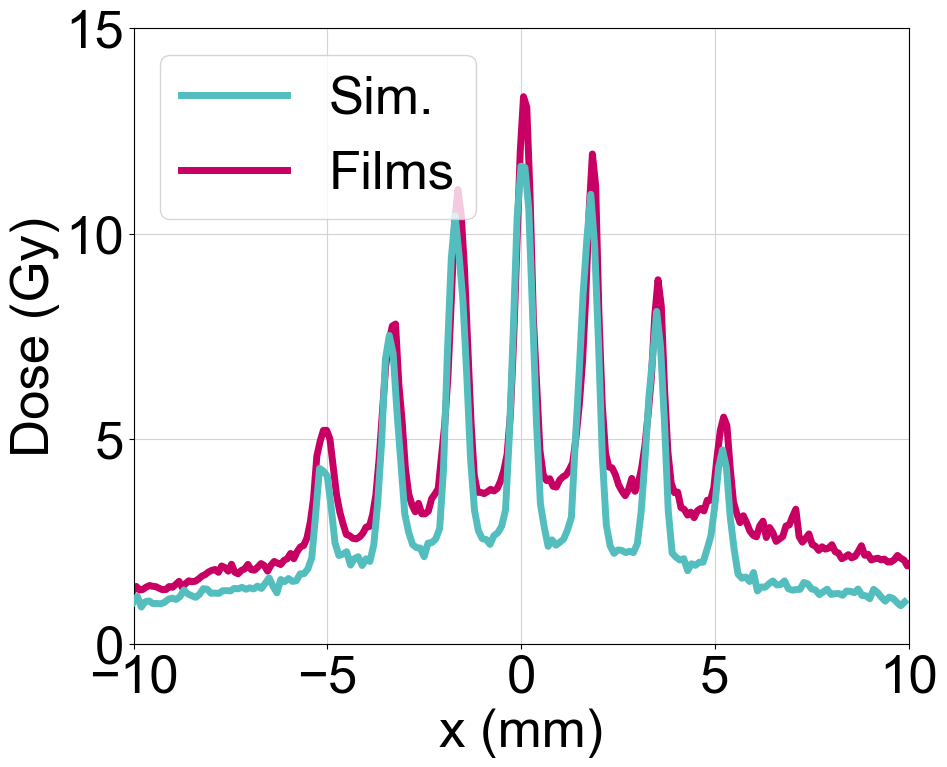

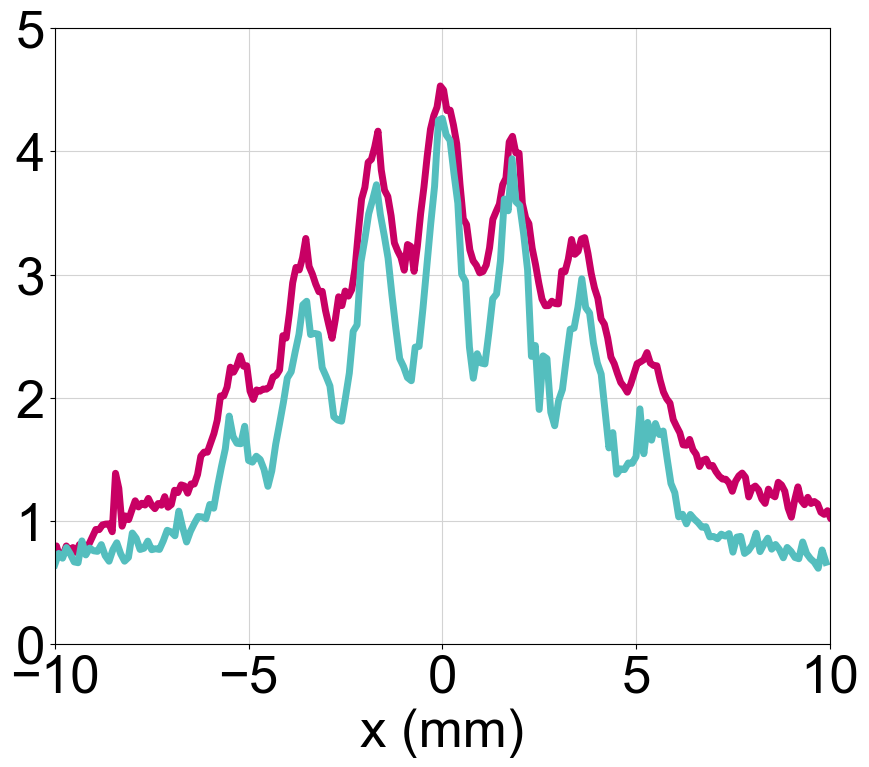

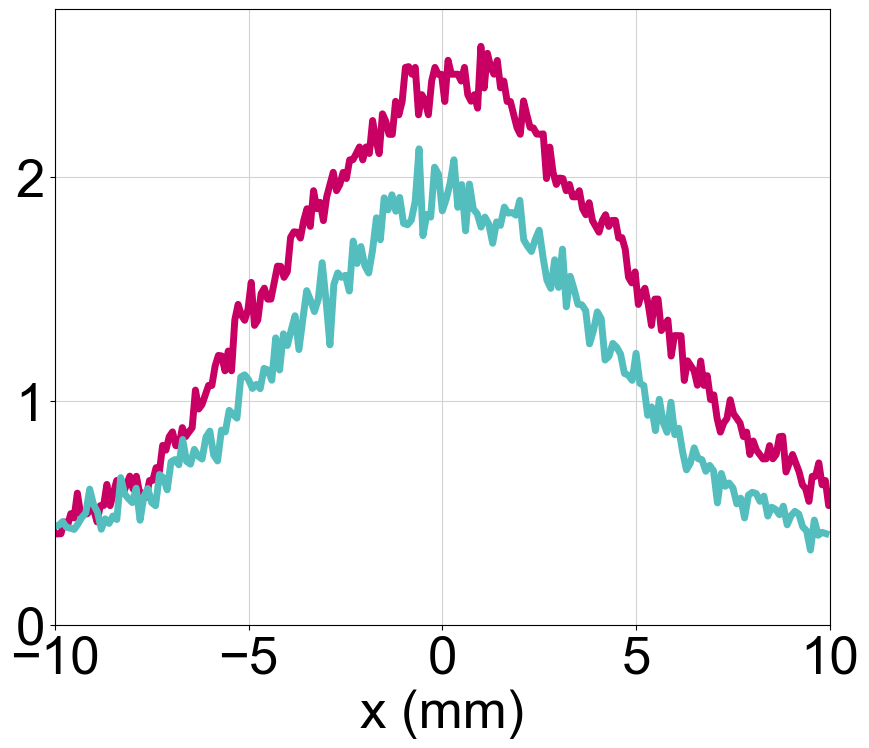

In [8]:
%matplotlib inline
#it was size 10,8

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 38}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#c80064","#54bebe"])

sim1d_1=np.load('D:Desktop/thesis/grid1d_x1.npy')
sim1d_2=np.load('D:Desktop/thesis/grid1d_x3.npy')
sim1d_3=np.load('D:Desktop/thesis/grid1d_x2.npy') #not a mistake lol

figure(1,figsize=(10,8))
plt.plot(np.arange(0,len(sim1d_1))*0.1-10,sim1d_1,lw=5,label='Sim.',c="#54bebe",zorder=3)
plt.plot(np.arange(0,len(tr1[0]))/300*25.4-6.7-10,np.mean([tr1[219],tr1[218],tr1[220]],axis=0)*(2.73e-8),lw=5,label='Films',c="#c80064",zorder=2)
plt.xlim(-10,10)
plt.ylim(0,15)
plt.xticks([-10,-5,0,5,10])
plt.grid(c='lightgray',zorder=1)
plt.ylabel('Dose (Gy)')
plt.xlabel('x (mm)')
plt.legend( loc='upper left')

figure(2,figsize=(10,8))
plt.plot((np.arange(0,len(tr2[0])))/300*25.4-6.7-10-0.2,np.mean([tr2[231],tr2[232],tr2[230]],axis=0)*(2.73e-8),lw=5,label='33 mm GRID')
plt.plot(np.arange(0,len(sim1d_1))*0.1-10,sim1d_2,lw=5)
plt.xlim(-10,10)
plt.ylim(0,5)
plt.xticks([-10,-5,0,5,10])
plt.grid(c='lightgray')
#plt.ylabel('Dose (Gy)')
plt.xlabel('x (mm)')

print(np.shape(grid200[0]))
figure(3,figsize=(10,8))
plt.plot((np.arange(0,len(grid200[0][-1][0]))+5)/300*25.4-6.7-10,np.mean([grid200[0][-1][222],grid200[0][-1][221],grid200[0][-1][223]],axis=0)*(2.73e-8),lw=5,label='Films')
plt.plot(np.arange(0,len(sim1d_1))*0.1-10,sim1d_3,lw=5,label='Simulation')
plt.xlim(-10,10)
plt.ylim(0,2.75)
plt.xticks([-10,-5,0,5,10])
plt.grid(c='lightgray')
#plt.ylabel('Dose (Gy)')
plt.xlabel('x (mm)')
#plt.legend()